In [1]:
from keras.utils import np_utils
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta, SGD
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
import os
import numpy as np
import keras
import h5py
import numpy as np
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K


Using TensorFlow backend.


In [9]:
def dir_test(path):
    return len(os.listdir(path))

w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img

def change_depth(img):
    '''Depth is 32 now
    '''
    img_start = img[:,:,:8]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-8:mid+8]
    
    img_end = img[:,:,-8:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img

def get_number(filename):
    return int(filename[:filename.find('.')])

def sort_paths(paths):
    paths.sort(key = get_number)
    return paths

def load_numpy(path):
    val = np.load(path)
    print(val.shape)
    return val

def expand_dims(val):
    val_exp = np.expand_dims(val, axis=4)
    return val_exp

def plot_slice(img, sl_num):
    plt.imshow(img[:,:,sl_num])

In [4]:
raw_data_path = "E:/ImageClef/clef_dataset/img_datas_1/"
test_data_path = "E:/ImageClef/clef_dataset/test_images/"
data_resized_path = "E:/ImageClef/clef_dataset/all_data_rs/"

In [5]:
y_train = np.load("E:/ImageClef/clef_dataset/y_train.npy")
y_train.shape

(218, 2)

In [6]:
sort_paths(os.listdir(raw_data_path))[:5]

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy']

In [10]:
os.listdir(data_resized_path)

['1.npy',
 '10.npy',
 '100.npy',
 '101.npy',
 '102.npy',
 '103.npy',
 '104.npy',
 '105.npy',
 '106.npy',
 '107.npy',
 '108.npy',
 '109.npy',
 '11.npy',
 '110.npy',
 '111.npy',
 '112.npy',
 '113.npy',
 '114.npy',
 '115.npy',
 '116.npy',
 '117.npy',
 '118.npy',
 '119.npy',
 '12.npy',
 '120.npy',
 '121.npy',
 '122.npy',
 '123.npy',
 '124.npy',
 '125.npy',
 '126.npy',
 '127.npy',
 '128.npy',
 '129.npy',
 '13.npy',
 '130.npy',
 '131.npy',
 '132.npy',
 '133.npy',
 '134.npy',
 '135.npy',
 '136.npy',
 '137.npy',
 '138.npy',
 '139.npy',
 '14.npy',
 '140.npy',
 '141.npy',
 '142.npy',
 '143.npy',
 '144.npy',
 '145.npy',
 '146.npy',
 '147.npy',
 '148.npy',
 '149.npy',
 '15.npy',
 '150.npy',
 '151.npy',
 '152.npy',
 '153.npy',
 '154.npy',
 '155.npy',
 '156.npy',
 '157.npy',
 '158.npy',
 '159.npy',
 '16.npy',
 '160.npy',
 '161.npy',
 '162.npy',
 '163.npy',
 '164.npy',
 '165.npy',
 '166.npy',
 '167.npy',
 '168.npy',
 '169.npy',
 '17.npy',
 '170.npy',
 '171.npy',
 '172.npy',
 '173.npy',
 '174.npy',
 '

* Load raw image
* Resize w,h and depth,then save in new folder

In [11]:
c = 0
for path in sort_paths(os.listdir(raw_data_path)):
    
    # load data
    img = np.load(raw_data_path + "{}".format(path))
    # Resize w, h
    img = rs_img(img)
    # Resize depth
    img_rs = change_depth(img)
    
    c+=1
    print(c, "--", path, "-----", img.shape, "-------", img_rs.shape)
    # Save
    np.save(data_resized_path+ "{}.npy".format(c), img_rs)
    img = None
    
print("done")

1 -- 1.npy ----- (128, 128, 128) ------- (128, 128, 32)
2 -- 2.npy ----- (128, 128, 122) ------- (128, 128, 32)
3 -- 3.npy ----- (128, 128, 113) ------- (128, 128, 32)
4 -- 4.npy ----- (128, 128, 120) ------- (128, 128, 32)
5 -- 5.npy ----- (128, 128, 116) ------- (128, 128, 32)
6 -- 6.npy ----- (128, 128, 131) ------- (128, 128, 32)
7 -- 7.npy ----- (128, 128, 123) ------- (128, 128, 32)
8 -- 8.npy ----- (128, 128, 132) ------- (128, 128, 32)
9 -- 9.npy ----- (128, 128, 144) ------- (128, 128, 32)
10 -- 10.npy ----- (128, 128, 131) ------- (128, 128, 32)
11 -- 11.npy ----- (128, 128, 133) ------- (128, 128, 32)
12 -- 12.npy ----- (128, 128, 132) ------- (128, 128, 32)
13 -- 13.npy ----- (128, 128, 129) ------- (128, 128, 32)
14 -- 14.npy ----- (128, 128, 116) ------- (128, 128, 32)
15 -- 15.npy ----- (128, 128, 130) ------- (128, 128, 32)
16 -- 16.npy ----- (128, 128, 125) ------- (128, 128, 32)
17 -- 17.npy ----- (128, 128, 104) ------- (128, 128, 32)
18 -- 18.npy ----- (128, 128, 11

142 -- 142.npy ----- (128, 128, 132) ------- (128, 128, 32)
143 -- 143.npy ----- (128, 128, 119) ------- (128, 128, 32)
144 -- 144.npy ----- (128, 128, 138) ------- (128, 128, 32)
145 -- 145.npy ----- (128, 128, 124) ------- (128, 128, 32)
146 -- 146.npy ----- (128, 128, 138) ------- (128, 128, 32)
147 -- 147.npy ----- (128, 128, 136) ------- (128, 128, 32)
148 -- 148.npy ----- (128, 128, 119) ------- (128, 128, 32)
149 -- 149.npy ----- (128, 128, 134) ------- (128, 128, 32)
150 -- 150.npy ----- (128, 128, 134) ------- (128, 128, 32)
151 -- 151.npy ----- (128, 128, 139) ------- (128, 128, 32)
152 -- 152.npy ----- (128, 128, 125) ------- (128, 128, 32)
153 -- 153.npy ----- (128, 128, 134) ------- (128, 128, 32)
154 -- 154.npy ----- (128, 128, 121) ------- (128, 128, 32)
155 -- 155.npy ----- (128, 128, 127) ------- (128, 128, 32)
156 -- 156.npy ----- (128, 128, 121) ------- (128, 128, 32)
157 -- 157.npy ----- (128, 128, 120) ------- (128, 128, 32)
158 -- 158.npy ----- (128, 128, 123) ---

In [12]:
sort_paths(os.listdir(data_resized_path))[:5]

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy']

In [13]:
x_train = []
c = 0
for path in sort_paths(os.listdir(data_resized_path))[:]:
    img = None
    img = np.load(data_resized_path+ "{}".format(path))
    # slice and dice
    x_train.append(img)
    c+=1
    print(c, "----", data_resized_path+path, img.shape)

x_train = np.array(x_train)
x_train.shape

1 ---- E:/ImageClef/clef_dataset/all_data_rs/1.npy (128, 128, 32)
2 ---- E:/ImageClef/clef_dataset/all_data_rs/2.npy (128, 128, 32)
3 ---- E:/ImageClef/clef_dataset/all_data_rs/3.npy (128, 128, 32)
4 ---- E:/ImageClef/clef_dataset/all_data_rs/4.npy (128, 128, 32)
5 ---- E:/ImageClef/clef_dataset/all_data_rs/5.npy (128, 128, 32)
6 ---- E:/ImageClef/clef_dataset/all_data_rs/6.npy (128, 128, 32)
7 ---- E:/ImageClef/clef_dataset/all_data_rs/7.npy (128, 128, 32)
8 ---- E:/ImageClef/clef_dataset/all_data_rs/8.npy (128, 128, 32)
9 ---- E:/ImageClef/clef_dataset/all_data_rs/9.npy (128, 128, 32)
10 ---- E:/ImageClef/clef_dataset/all_data_rs/10.npy (128, 128, 32)
11 ---- E:/ImageClef/clef_dataset/all_data_rs/11.npy (128, 128, 32)
12 ---- E:/ImageClef/clef_dataset/all_data_rs/12.npy (128, 128, 32)
13 ---- E:/ImageClef/clef_dataset/all_data_rs/13.npy (128, 128, 32)
14 ---- E:/ImageClef/clef_dataset/all_data_rs/14.npy (128, 128, 32)
15 ---- E:/ImageClef/clef_dataset/all_data_rs/15.npy (128, 128, 32

171 ---- E:/ImageClef/clef_dataset/all_data_rs/171.npy (128, 128, 32)
172 ---- E:/ImageClef/clef_dataset/all_data_rs/172.npy (128, 128, 32)
173 ---- E:/ImageClef/clef_dataset/all_data_rs/173.npy (128, 128, 32)
174 ---- E:/ImageClef/clef_dataset/all_data_rs/174.npy (128, 128, 32)
175 ---- E:/ImageClef/clef_dataset/all_data_rs/175.npy (128, 128, 32)
176 ---- E:/ImageClef/clef_dataset/all_data_rs/176.npy (128, 128, 32)
177 ---- E:/ImageClef/clef_dataset/all_data_rs/177.npy (128, 128, 32)
178 ---- E:/ImageClef/clef_dataset/all_data_rs/178.npy (128, 128, 32)
179 ---- E:/ImageClef/clef_dataset/all_data_rs/179.npy (128, 128, 32)
180 ---- E:/ImageClef/clef_dataset/all_data_rs/180.npy (128, 128, 32)
181 ---- E:/ImageClef/clef_dataset/all_data_rs/181.npy (128, 128, 32)
182 ---- E:/ImageClef/clef_dataset/all_data_rs/182.npy (128, 128, 32)
183 ---- E:/ImageClef/clef_dataset/all_data_rs/183.npy (128, 128, 32)
184 ---- E:/ImageClef/clef_dataset/all_data_rs/184.npy (128, 128, 32)
185 ---- E:/ImageCle

(218, 128, 128, 32)

In [14]:
x_train = expand_dims(x_train)
x_train.shape, y_train.shape

((218, 128, 128, 32, 1), (218, 2))

In [21]:
def m_naive():
    
    filter_size = 32
    input_layer = Input((128, 128, 32, 1)) # 1 is just dummy dimension good for nothing 
    
    conv_layer1 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)

        
    #conv_layer2 = Conv3D(filters=16, kernel_size=(2, 2, 2), activation='relu')(pooling_layer1)
    #pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

    #conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    #pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)

    conv_layer4 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(pooling_layer1)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

    conv_layer5 = Conv3D(filters=filter_size, kernel_size=(2, 2, 2), activation='relu')(pooling_layer4)
    pooling_layer5 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer5)
    
    pooling_layer9 = BatchNormalization()(pooling_layer5)
    flatten_layer = Flatten()(pooling_layer9)

    dense_layer1 = Dense(units=1028, activation='relu')(flatten_layer)
    dense_layer1 = Dropout(0.4)(dense_layer1)
    
    
    dense_layer2 = Dense(units=1028, activation='relu')(dense_layer1)
    dense_layer2 = Dropout(0.4)(dense_layer2)
    
    dense_layer3 = Dense(units=512, activation='relu')(dense_layer2)
    dense_layer3 = Dropout(0.4)(dense_layer3)

    dense_layer4 = Dense(units=256, activation='relu')(dense_layer2)
    dense_layer4 = Dropout(0.4)(dense_layer3)

    output_layer = Dense(units=2, activation='softmax')(dense_layer4)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss=categorical_crossentropy, optimizer=SGD(lr=1e-4, momentum=0.9), metrics=['acc']) # # optimizers.SGD(lr=1e-4, momentum=0.9)
    
    return model

model = None
model = m_naive()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 128, 128, 32, 1)   0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 127, 127, 31, 32)  288       
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 63, 63, 15, 32)    0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 62, 62, 14, 32)    8224      
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 31, 31, 7, 32)     0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 30, 30, 6, 32)     8224      
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 15, 15, 3, 32)     0         
__________

In [22]:
x_train.shape, y_train.shape

((218, 128, 128, 32, 1), (218, 2))

In [23]:
model = None
model= m_naive()
path_model='clef-2.h5'  

# set the learning rate
#K.set_value(model.optimizer.lr, 0.01) 

h=model.fit(x=x_train,     
            y=y_train, 
            batch_size=4, 
            epochs=300, 
            verbose=1, 
            validation_split = 0.1,
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )


Train on 196 samples, validate on 22 samples
Epoch 1/300
196/196 [==============================] - 11s 54ms/step - loss: 1.2101 - acc: 0.4847 - val_loss: 0.8259 - val_acc: 0.4091
Epoch 2/300
196/196 [==============================] - 8s 43ms/step - loss: 1.3533 - acc: 0.5000 - val_loss: 0.6361 - val_acc: 0.6364
Epoch 3/300
196/196 [==============================] - 8s 43ms/step - loss: 1.2382 - acc: 0.5051 - val_loss: 1.0227 - val_acc: 0.5000
Epoch 4/300
196/196 [==============================] - 8s 43ms/step - loss: 1.2187 - acc: 0.5000 - val_loss: 0.7571 - val_acc: 0.5000
Epoch 5/300
196/196 [==============================] - 9s 45ms/step - loss: 1.1866 - acc: 0.4184 - val_loss: 0.7428 - val_acc: 0.5000
Epoch 6/300
196/196 [==============================] - 8s 43ms/step - loss: 0.8820 - acc: 0.5255 - val_loss: 0.7041 - val_acc: 0.5455
Epoch 7/300
196/196 [==============================] - 9s 44ms/step - loss: 0.8946 - acc: 0.5459 - val_loss: 0.6533 - val_acc: 0.6818
Epoch 8/300
196/

196/196 [==============================] - 8s 42ms/step - loss: 0.0271 - acc: 1.0000 - val_loss: 1.1189 - val_acc: 0.5909
Epoch 62/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0318 - acc: 0.9898 - val_loss: 1.5801 - val_acc: 0.4545
Epoch 63/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0289 - acc: 0.9949 - val_loss: 1.2644 - val_acc: 0.4545
Epoch 64/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0356 - acc: 0.9898 - val_loss: 1.3027 - val_acc: 0.5455
Epoch 65/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0201 - acc: 0.9949 - val_loss: 1.3466 - val_acc: 0.5455
Epoch 66/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0178 - acc: 1.0000 - val_loss: 1.5476 - val_acc: 0.4091
Epoch 67/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0192 - acc: 1.0000 - val_loss: 1.4698 - val_acc: 0.5000
Epoch 68/300
196/196 [==============================] - 8s 42ms/step

196/196 [==============================] - 8s 43ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.5602 - val_acc: 0.4545
Epoch 122/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 1.6215 - val_acc: 0.4091
Epoch 123/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.6486 - val_acc: 0.4091
Epoch 124/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.6171 - val_acc: 0.4091
Epoch 125/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 1.6478 - val_acc: 0.4545
Epoch 126/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.6689 - val_acc: 0.4091
Epoch 127/300
196/196 [==============================] - 8s 42ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.6972 - val_acc: 0.4091
Epoch 128/300
196/196 [==============================] - 8s 42

196/196 [==============================] - 8s 43ms/step - loss: 7.0663e-04 - acc: 1.0000 - val_loss: 1.8839 - val_acc: 0.4545
Epoch 182/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.8705 - val_acc: 0.4545
Epoch 183/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 2.0580 - val_acc: 0.4091
Epoch 184/300
196/196 [==============================] - 8s 43ms/step - loss: 9.2661e-04 - acc: 1.0000 - val_loss: 1.9176 - val_acc: 0.4545
Epoch 185/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.8915 - val_acc: 0.4091
Epoch 186/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.8067 - val_acc: 0.4545
Epoch 187/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 2.0145 - val_acc: 0.4091
Epoch 188/300
196/196 [==============================]

196/196 [==============================] - 8s 43ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.8409 - val_acc: 0.4545
Epoch 241/300
196/196 [==============================] - 8s 43ms/step - loss: 9.4793e-04 - acc: 1.0000 - val_loss: 1.9343 - val_acc: 0.4091
Epoch 242/300
196/196 [==============================] - 8s 43ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.7974 - val_acc: 0.5000
Epoch 243/300
196/196 [==============================] - 8s 43ms/step - loss: 4.5126e-04 - acc: 1.0000 - val_loss: 1.7994 - val_acc: 0.5000
Epoch 244/300
196/196 [==============================] - 8s 42ms/step - loss: 4.8603e-04 - acc: 1.0000 - val_loss: 1.8386 - val_acc: 0.4091
Epoch 245/300
196/196 [==============================] - 8s 43ms/step - loss: 7.7469e-04 - acc: 1.0000 - val_loss: 1.8402 - val_acc: 0.4091
Epoch 246/300
196/196 [==============================] - 8s 42ms/step - loss: 9.2872e-04 - acc: 1.0000 - val_loss: 1.8762 - val_acc: 0.4091
Epoch 247/300
196/196 [===================

196/196 [==============================] - 8s 43ms/step - loss: 6.0062e-04 - acc: 1.0000 - val_loss: 1.9910 - val_acc: 0.4091
Epoch 300/300
196/196 [==============================] - 8s 42ms/step - loss: 3.2286e-04 - acc: 1.0000 - val_loss: 2.0107 - val_acc: 0.4091


In [24]:
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid()
    plt.show()

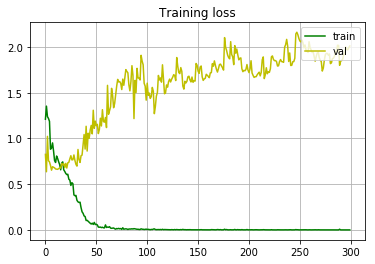

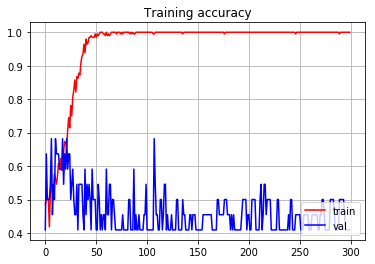

In [25]:
plot_loss_accu(h) # depth = 32

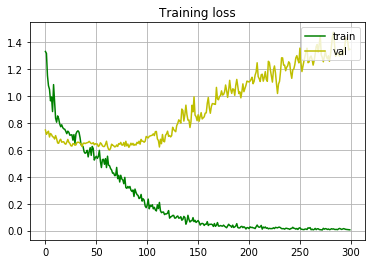

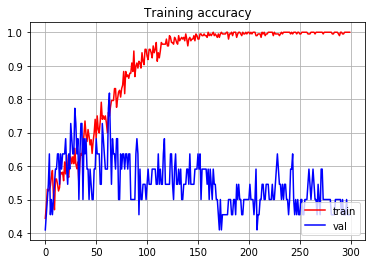

In [11]:
plot_loss_accu(h) # depth = 16